# Optimal Stimulus

This section computes the optimal level of public expenditure for any given current unemployment rate by using the sufficient-statistics formula. Before we start, we set up the libraries and read in the helper functions. 

In [32]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
%run helpers.ipynb

## Calculating Optimal Stimulus

First, we load the calibrated parameter values from our previous section. Feel free to change any parameter in `params` to see how optimal stimulus changes. 

In [33]:
params = pd.read_csv('output/params_suffstat.csv')
params = dict(params.values)
params

{'s': 0.035578947368421,
 'u_bar': 0.0597499999999999,
 'x_bar': 0.557752047505985,
 'GC_bar': 0.1919172928067347,
 'M_bar': 0.5,
 'M_bar_l': 0.0,
 'M_bar_h': 2.0,
 'epsilon': 1.0,
 'epsilon_h': 1.5,
 'epsilon_l': 0.5,
 'eta': 0.6,
 'eta_l': 0.5,
 'eta_h': 0.7,
 'omega': 0.7071671173494025,
 'rho': 1.080804575426955,
 'tau': 0.038731944011991,
 'm_bar': 0.5100528390820994,
 'z0': 2.827830175507158,
 'z1': 2.2609135556386306,
 'GY_bar': 0.1610156123792839}

We want to find out what the optimal stimulus is for any deviation from the steady state. We do so with the following equation:

                $\frac{g/c - (g/c)^*}{(g/c)^*} \approx \frac{z_0 \epsilon m}{1 + z_1 z_0\epsilon m^2}\cdot \frac{u_0 - \bar{u}}{\bar{u}}.$          [![Generic badge](https://img.shields.io/badge/MS19-Eq%2023-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

For convenience, we define the following wrapper, which wrap the sufficient statistics formula into a function that only takes in the three sufficient statistics. and calculates optimal stimulus as a percentage of GDP for different $\epsilon$'s from the LHS of the equation above using accounting identities:

In [34]:
stim_func = lambda M, epsilon, u0:(GY_func((suffstat_func(m=m_func(which='M', M=M, u=params['u_bar'], GY=GY_func(params['GC_bar']), **params), 
                                                          z0=params['z0'], z1=params['z1'],
                                                          epsilon=epsilon, u0=u0, u_bar=params['u_bar']) + 1)*
                                    params['GC_bar']) - GY_func(params['GC_bar']))*100

We then set the values for our sufficient statistics. 
```{important}
Here, we set $u_0 = 9\%$, which means we want to calculate the optimal stimulus when current unemployment rate is around $3$ percentage points higher than the steady-state value. We also set $\epsilon$ and $M$ to be our calibrated values in the previous section. Feel free to change these values to see how the optimal stimulus changes. 
```

In [35]:
u0 = 0.09
M = params['M_bar']
epsilon = params['epsilon']

With the above sufficient statistics, the optimal stimulus, as a percentage of GDP, is:

In [36]:
stim_func(epsilon=epsilon, u0=u0, M=M)

3.5472986868924803

We also calculate optimal stimulus for a range of $M$'s for the $\epsilon$ we set:

In [37]:
M_vals = np.linspace(start=params['M_bar_l'], stop=params['M_bar_h'], num=101)

Below is what optimal stimulus spending looks like for different unemployment multipliers. 

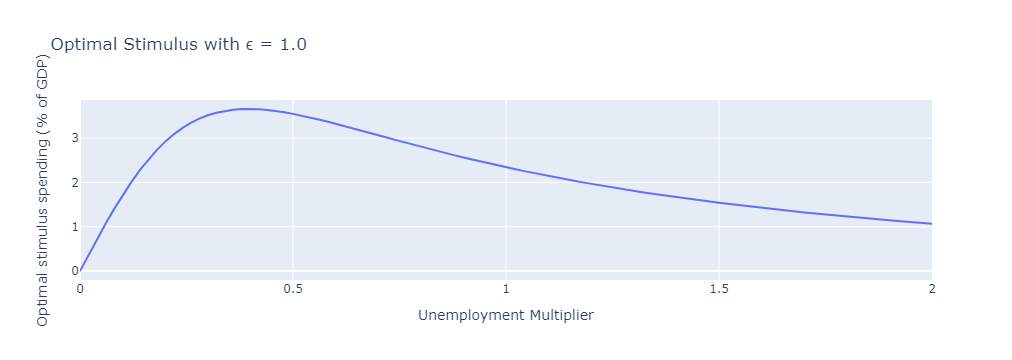

In [38]:
stim_vals_Ms = stim_func(epsilon=epsilon, M=M_vals, u0=u0)
stim = pd.DataFrame(data={'M':M_vals,
                          'G/Y':stim_vals_Ms})
fig = px.line(stim, x="M", y='G/Y', 
              labels={"M": "Unemployment Multiplier",
                      "G/Y": "Optimal stimulus spending (% of GDP)"},
              title=f'Optimal Stimulus with ϵ = {epsilon}')
fig

We can also see what optimal stimulus looks like for a range of $\epsilon$'s.

In [39]:
eps_vals = np.linspace(start=params['epsilon_l'], stop=params['epsilon_h'], num=101)

Below is what optimal stimulus spending looks like for elasticities of substitution between private and public consumption: 

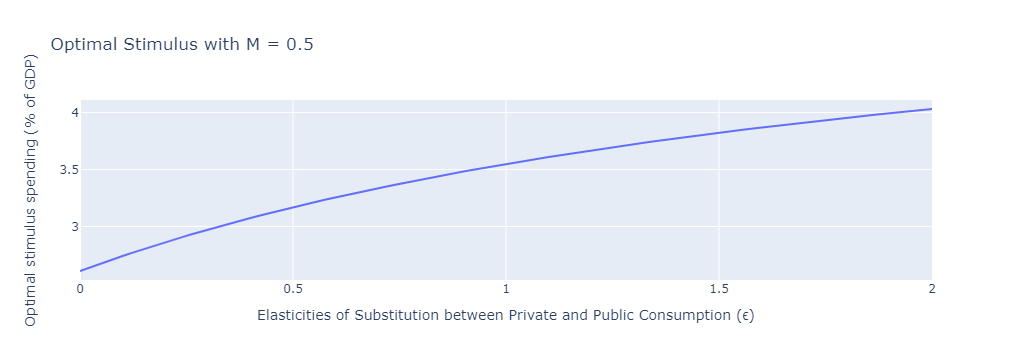

In [40]:
stim_vals_eps = stim_func(epsilon=eps_vals, M=M, u0=u0)
stim = pd.DataFrame(data={'ϵ':M_vals,
                          'G/Y':stim_vals_eps})
fig = px.line(stim, x="ϵ", y='G/Y', 
              labels={"ϵ": "Elasticities of Substitution between Private and Public Consumption (ϵ)",
                      "G/Y": "Optimal stimulus spending (% of GDP)"},
              title=f'Optimal Stimulus with M = {M}')
fig